In [25]:
import sys
sys.path.append('../')

In [26]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import RY_ansatz, VarFourier

In [27]:
num_qubits = 4

In [28]:
def init_state():
    pass 

In [29]:
num_layers = 3
var_state_class = RY_ansatz(num_qubits,num_layers)
var_state = var_state_class.construct_circuit

num_params = var_state_class.num_params
num_params

12

(<Figure size 1400x500 with 1 Axes>, <Axes: >)

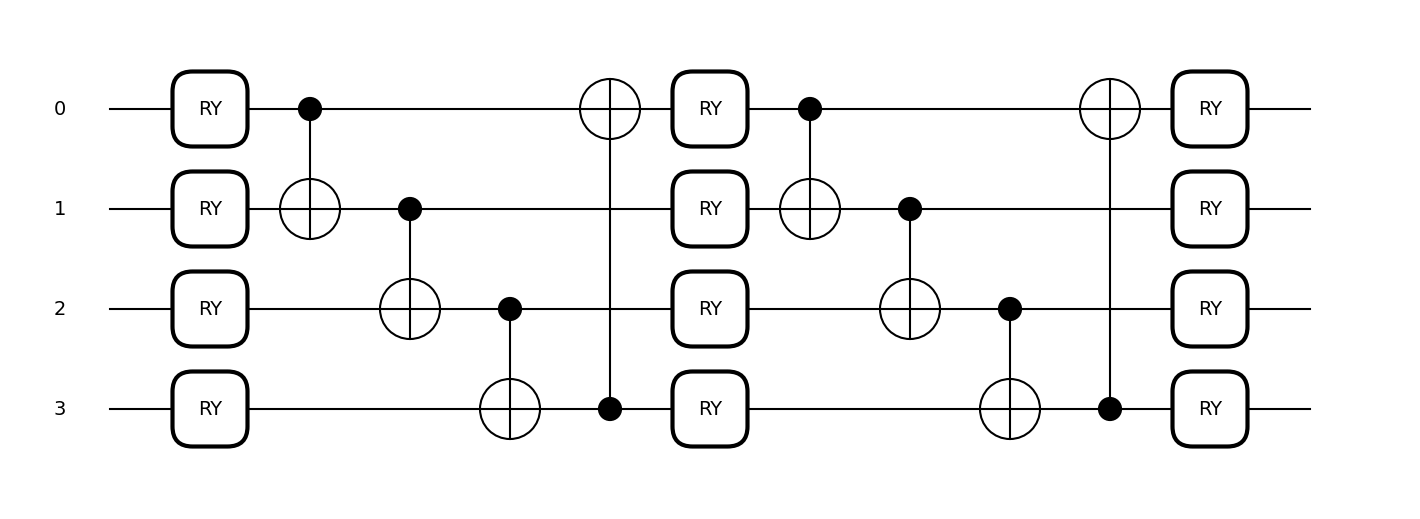

In [30]:
qml.draw_mpl( var_state )( num_params*[0] )

In [31]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : x**2/2,
                    lambda p : p**2/2,
                    device,
                    var_state  = var_state,
                    init_state = init_state
                    )

In [32]:
val, vec = varqft.min_energy_eigens()
val 

0.5000000011276804

In [33]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : x**2/2,
                    lambda p : p**2/2,
                    device,
                    var_state  = var_state,
                    init_state = init_state
                    )

In [34]:
params_init = np.random.randn( num_params )*0.01

params_ground, energies_ground = varqft.run( params_init, max_iterations=500, learning_rate=0.1 )

Step = 0,  Energy = 15.51265430
Step = 5,  Energy = 11.33110809
Step = 10,  Energy = 6.55592012
Step = 15,  Energy = 5.13411236
Step = 20,  Energy = 2.53700352
Step = 25,  Energy = 1.99528170
Step = 30,  Energy = 1.88678432
Step = 35,  Energy = 1.31894159
Step = 40,  Energy = 1.37956882
Step = 45,  Energy = 1.23879266
Step = 50,  Energy = 1.18248439
Step = 55,  Energy = 1.05444908
Step = 60,  Energy = 0.95839500
Step = 65,  Energy = 0.82879198
Step = 70,  Energy = 0.68396282
Step = 75,  Energy = 0.60881925
Step = 80,  Energy = 0.57820666
Step = 85,  Energy = 0.56039834
Step = 90,  Energy = 0.54667723
Step = 95,  Energy = 0.53860521
Step = 100,  Energy = 0.53411078
Step = 105,  Energy = 0.53119522
Step = 110,  Energy = 0.52975667


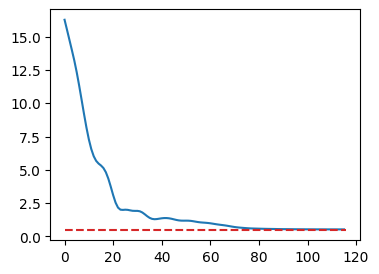

In [35]:
plt.figure( figsize=(4,3) ) 
plt.plot( energies_ground )
plt.hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

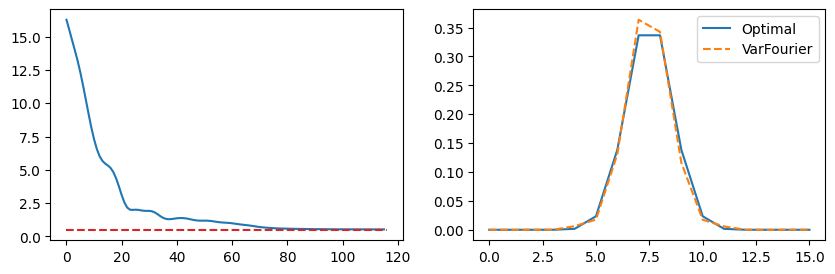

In [36]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vec)**2) 
ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 